In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import RMSprop,Adam
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, GlobalMaxPooling2D, Conv2D, MaxPooling2D,BatchNormalization
from tensorflow.keras.callbacks import CSVLogger
from keras.callbacks import EarlyStopping


from google.colab import drive
drive.mount('/gdrive/',force_remount=True)

Mounted at /gdrive/


In [2]:
TRAINING_LOGS_FILE = "training_logs.csv"
MODEL_SUMMARY_FILE = "model_summary.txt"
MODEL_FILE = "/gdrive/MyDrive/Data Set/model/CNN__modelf.h5"
WEIGHT_FILE="/gdrive/MyDrive/Data Set/model/CNN_weight.h5"

# Data
path = "/gdrive/MyDrive/Data Set/MelData/"
training_data_dir = path + "eval" 
validation_data_dir = path + "dev" 
test_data_dir = path + "train" # 12 500

In [3]:
# Hyperparams
IMAGE_SIZE = 150
IMAGE_WIDTH, IMAGE_HEIGHT = 150, 150
EPOCHS = 20
BATCH_SIZE = 16
TEST_SIZE = 30
N_CLASSES=2

input_shape = (IMAGE_WIDTH, IMAGE_HEIGHT, 3)

In [4]:
# Create CNN model
import tensorflow as tf
model = tf.keras.models.Sequential([
    #first_convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=input_shape),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    #second_convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    #third_convolution
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    #fourth_convolution
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),

    tf.keras.layers.Dense(1, activation='sigmoid') 
]) 

# Compile model
model.compile(loss ='binary_crossentropy', metrics=['accuracy'], optimizer=keras.optimizers.Adam(lr=0.0001))


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [5]:
# Data augmentation
training_data_generator = ImageDataGenerator(rescale = 1./255,
                                            shear_range = 0.2,
                                            zoom_range = 0.2,
                                            horizontal_flip = True,
                                             )
validation_data_generator = ImageDataGenerator(rescale=1./255 )
test_data_generator = ImageDataGenerator(rescale=1./255)

In [6]:
# Data preparation
training_generator = training_data_generator.flow_from_directory(
    training_data_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    shuffle=True,
    batch_size=BATCH_SIZE,
    #color_mode='grayscale',
    class_mode="binary")
validation_generator = validation_data_generator.flow_from_directory(
    validation_data_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    shuffle=True,
    batch_size=BATCH_SIZE,
    #color_mode='grayscale',
    class_mode="binary")

test_generator = test_data_generator.flow_from_directory(
    test_data_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    shuffle=False,
    batch_size=BATCH_SIZE,
    #color_mode='grayscale',
    class_mode="binary")

Found 13305 images belonging to 2 classes.
Found 1710 images belonging to 2 classes.
Found 3014 images belonging to 2 classes.


In [7]:
checkpoint=keras.callbacks.ModelCheckpoint(WEIGHT_FILE,save_best_only=True,monitor='val_accuracy',mode='max')
monitor_val_acc = EarlyStopping(monitor = 'val_accuracy', patience = 3, mode= "max")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 74, 74, 64)       256       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 74, 74, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 128)      0

In [ ]:
# Training
H=model.fit(
    training_generator,
    steps_per_epoch=len(training_generator.filenames) // BATCH_SIZE,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=len(validation_generator.filenames) // BATCH_SIZE,
    callbacks=[checkpoint]
)
model.save_weights(MODEL_FILE)

Epoch 1/20
831/831 [==============================] - 3871s 5s/step - loss: 0.3083 - accuracy: 0.8975 - val_loss: 1.3082 - val_accuracy: 0.5554
Epoch 2/20
831/831 [==============================] - 2371s 3s/step - loss: 0.2445 - accuracy: 0.9019 - val_loss: 1.1383 - val_accuracy: 0.5596
Epoch 3/20
831/831 [==============================] - 2372s 3s/step - loss: 0.1974 - accuracy: 0.9143 - val_loss: 0.6519 - val_accuracy: 0.7105
Epoch 4/20
831/831 [==============================] - 2351s 3s/step - loss: 0.1683 - accuracy: 0.9246 - val_loss: 0.7054 - val_accuracy: 0.6969
Epoch 5/20
831/831 [==============================] - 2352s 3s/step - loss: 0.1483 - accuracy: 0.9338 - val_loss: 0.7651 - val_accuracy: 0.7671
Epoch 6/20
831/831 [==============================] - 2364s 3s/step - loss: 0.1405 - accuracy: 0.9385 - val_loss: 0.8338 - val_accuracy: 0.7636
Epoch 7/20
831/831 [==============================] - 2346s 3s/step - loss: 0.1276 - accuracy: 0.9453 - val_loss: 0.6395 - val_accuracy:

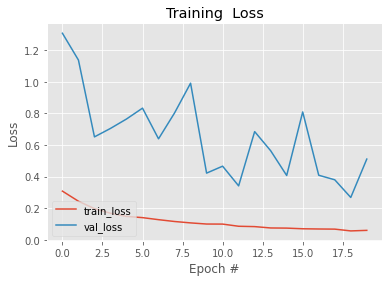

In [ ]:
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
#N = stopping.stopped_epoch + 1
plt.plot( H.history["loss"], label="train_loss")
plt.plot(H.history["val_loss"], label="val_loss")
plt.xlabel("Epoch #")
plt.title("Training  Loss")
plt.ylabel("Loss")
plt.legend(loc="lower left")

plt.savefig("/gdrive/MyDrive/Data Set/Loss_plot.png")

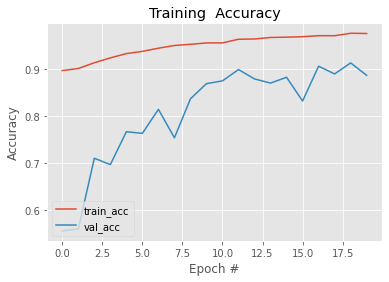

In [ ]:
plt.plot( H.history["accuracy"], label="train_acc")
plt.plot( H.history["val_accuracy"], label="val_acc")
plt.title("Training  Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend(loc="lower left")
plt.savefig("/gdrive/MyDrive/Data Set/training_accuracy.png")

Load model file and  run prediction just


In [ ]:
from pickle import dump
import tensorflow as tf
in_model=tf.keras.models.load_model(WEIGHT_FILE)

in_model.load_weights(MODEL_FILE)
predicted_classes = in_model.predict(test_generator)

In [ ]:
import numpy as np
classes=[]
for i in predicted_classes:
  
  if i>0.5:
    classes.append(1)
  else:
    classes.append(0)
    #classes.append(np.argmax(i))




[Text(0, 0.5, 'Spoof'), Text(0, 1.5, 'Genuine')]

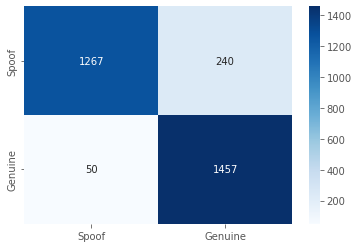

In [ ]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

ax= plt.subplot()
sns.heatmap(confusion_matrix(test_generator.classes, classes),annot=True,cmap='Blues', fmt='g',ax=ax)

ax.xaxis.set_ticklabels(['Spoof', 'Genuine'])
ax.yaxis.set_ticklabels(['Spoof', 'Genuine'])

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc



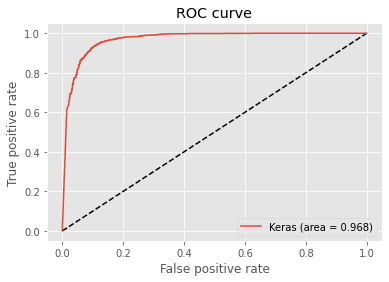

In [ ]:
fpr_keras, tpr_keras, thresholds_keras = roc_curve(test_generator.classes, predicted_classes)
auc_keras = auc(fpr_keras, tpr_keras)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [ ]:
m_accuracy = accuracy_score(test_generator.classes, classes)
print('Accuracy = '+ str(m_accuracy))
m_recall = recall_score(test_generator.classes, classes)
print('Recall = '+ str(m_recall))
m_precision = precision_score(test_generator.classes, classes)
print('Precision = '+ str(m_precision))
m_f1score= f1_score(test_generator.classes, classes)
print('F1 Score = '+ str(m_f1score))
m_auc = roc_auc_score(test_generator.classes, predicted_classes)
print('AUC = '+ str(m_auc))


Accuracy = 0.9037823490378235
Recall = 0.966821499668215
Precision = 0.858573954036535
F1 Score = 0.9094881398252184
AUC = 0.9678751977610347


In [ ]:
fnr = 1 - tpr_keras
eer_threshold = thresholds_keras[np.nanargmin(np.absolute((fnr - fpr_keras)))]
# theoretically eer from fpr and eer from fnr should be identical but they can be slightly differ in reality
eer_1 = fpr_keras[np.nanargmin(np.absolute((fnr - fpr_keras)))]
eer_2 = fnr[np.nanargmin(np.absolute((fnr - fpr_keras)))]
eer = (eer_1 + eer_2) / 2
print('EER = '+ str(eer))


EER = 0.08958195089581952
